## Exercise 1

Use the sklearn `make_blobs()` function to generate a non linearly separable dataset with 2 features. Fit a linear SVM to the dataset many times, varying the slack parameter $C$ and calculate the model performace in classifying the data. What is approximately the best value of the slack for this dataset?

In [22]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm, metrics
import numpy as np
from sklearn.model_selection import train_test_split

In [23]:
def generate_non_separable_data(n_samples = 1000, n_features = 2, center = [[-1,0],[1,0]], cluster_std = 1):
    nsx, nsy = make_blobs(n_samples, n_features, centers = center, cluster_std = cluster_std)
    return nsx, nsy

def fit_and_visualize(nspx, nspy, slack):

    x_train, x_test, y_train, y_test = train_test_split(nspx, nspy, test_size=0.2)

    svc_model = svm.SVC(kernel='linear', C = slack)
    svc_model.fit(x_train, y_train)

    # Prediction and evaluation
    x_test, y_test = generate_non_separable_data()
    label_pred = svc_model.predict(x_test)
    accuracy = metrics.precision_score(y_test, label_pred, average='binary')
    #accuracy = metrics.accuracy_score(y_test, label_pred)
    return accuracy


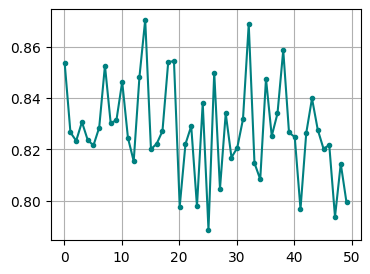

In [24]:
slacks = np.arange(0.1, 50, 1)
not_separable_x, not_separable_y = generate_non_separable_data(center = [[-1,0],[1,0]], 
                                                               n_samples=100, cluster_std=1)
accs = []
for s in slacks:
    a = fit_and_visualize(not_separable_x, not_separable_y, s)
    accs.append(a)

plt.figure(figsize=(4,3))
plt.plot(slacks, accs, '.-', color='teal')
plt.grid()

To evaluate the SVM performance I use the `accuracy_score` which for parameters `center = [[-1,0],[1,0]]`,`n_samples=100` and `cluster_std=2` always gives good values and doesn't seem to change much with increasing slack. 

Initially I found this weird but I realized that the problem stemed from using the accuracy score as an evaluation metric! If only 10% of the samples are wrong, then the accuracy is still rather high because the ratio of points outside the margin to those inside is very large, so **with these parameters** the accuracy always yields good results. We can see this fault bu changing for instance the center of the clusters and we'll get a drop in the accuracy. 

Nonetheless, I see no change in the accuracy with the slack. I tried other score measure but they all yielded the same. A good assessement of what slack value to use needs a different metric (which?)



## Exercise 2

Repeat exercise 1, but using a non-linear SVM model (the sklearn class `SVC` uses [Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function) as a default, check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)). 
To have a fairer assessment of the performance, train the model on a fraction (e.g. 80%) of the data, and test it on the other 20%.
Compare the performance of a linear SVC and a RBF SVC for dataset that are increaslingly non-linearly-separable.

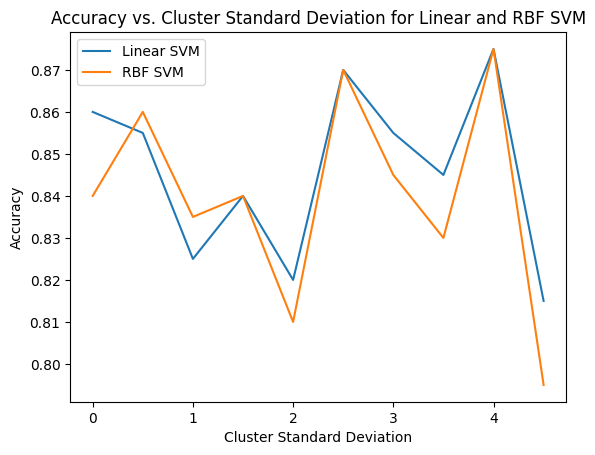

In [25]:
def evaluate_svm_performance(cluster_std):
    X, y = generate_non_separable_data()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    linear_svm = svm.SVC(kernel='linear', C=1)
    linear_svm.fit(X_train, y_train)
    y_pred_linear = linear_svm.predict(X_test)
    accuracy_linear = metrics.accuracy_score(y_test, y_pred_linear)
    
    rbf_svm = svm.SVC(kernel='rbf', C=1, gamma='scale')
    rbf_svm.fit(X_train, y_train)
    y_pred_rbf = rbf_svm.predict(X_test)
    accuracy_rbf = metrics.accuracy_score(y_test, y_pred_rbf)
    
    return accuracy_linear, accuracy_rbf

cluster_stds = np.arange(0,5,0.5)
results = []

for std in cluster_stds:
    accuracy_linear, accuracy_rbf = evaluate_svm_performance(std)
    results.append((std, accuracy_linear, accuracy_rbf))

cluster_stds, accuracies_linear, accuracies_rbf = zip(*results)

plt.plot(cluster_stds, accuracies_linear, label='Linear SVM')
plt.plot(cluster_stds, accuracies_rbf, label='RBF SVM')
plt.xlabel('Cluster Standard Deviation')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Cluster Standard Deviation for Linear and RBF SVM')
plt.legend()
plt.show()

I still see no difference :/